<a href="https://colab.research.google.com/github/beriaacan/Radon/blob/main/2_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#libraries
import pandas as pd
from googleapiclient.discovery import build
from google.oauth2 import service_account
import time
from prophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns #korelasyon matrisi icin
import matplotlib.pyplot as plt
import os

In [5]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
FOLDERNAME ='bitirme/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

In [7]:
# CSV dosyalarının bulunduğu klasörün yolu
csv_folder_path = '/content/drive/My Drive/bitirme/radon_analysis_final/full_data_csv'

all_sheet_names = []

# Klasördeki tüm CSV dosyalarını tek tek oku ve görüntüle
for sheet_names in os.listdir(csv_folder_path):
    if sheet_names.endswith('.csv'):
        # Her bir sheet adını listeye ekle
        all_sheet_names.append(sheet_names)

# Sonuçları görüntüle
print("All Sheet Names:", all_sheet_names)

All Sheet Names: ['data_+905367791473_tel.csv', 'data_+905396792291_tel.csv', 'data_+905396792336_tel.csv', 'data_+905396792349_tel.csv', 'data_+905396792354_tel.csv', 'data_+905396792374_tel.csv', 'data_+905396792381_tel.csv', 'data_+905396792392_tel.csv', 'data_+905396792421_tel.csv', 'data_+905396792427_tel.csv', 'data_+905396792434_tel.csv', 'data_+905396792435_tel.csv', 'data_+905396792437_tel.csv', 'data_+905396792448_tel.csv', 'data_+905396792487_tel.csv', 'data_+905396792489_tel.csv', 'data_+905396792490_tel.csv', 'data_+905396792491_tel.csv', 'data_+905396792843_tel.csv', 'data_+905396792846_tel.csv', 'data_+905396792925_tel.csv', 'data_+905396793149_tel.csv', 'data_+905396793157_tel.csv', 'data_+905396793168_tel.csv', 'data_+905396793181_tel.csv', 'data_+905396793193_tel.csv', 'data_+905396793194_tel.csv', 'data_+905396793196_tel.csv', 'data_+905396793221_tel.csv', 'data_+905396793223_tel.csv', 'data_+905396793234_tel.csv', 'data_+905396793243_tel.csv', 'data_+905396793256_te

Bursa'nın Mudanya Belediye binası, merkez üssü Marmara Denizi Gemlik Körfezi olan 5,1 büyüklüğündeki depremi sonrası merkez üssüne yakın bulunan 8 dedektör üzerinde inceleme yapıyorum.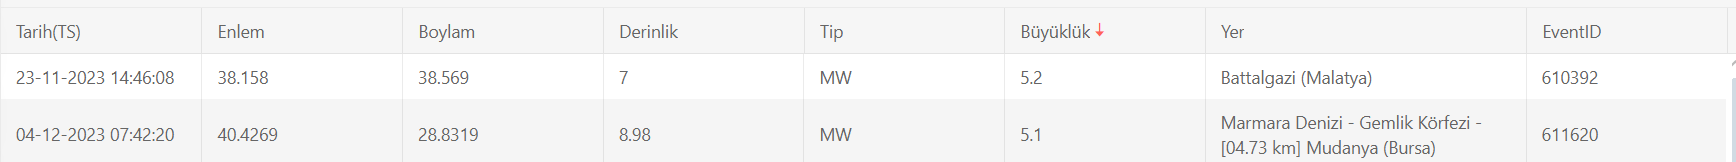

En yakın dedektör ID:

**çınarcık:**

15  data_+905396792434_tel

**gemlik :**

özdilek 3   data_+905396792349_tel ,   

gemsas 25  data_+905396792491_tel


**karacabey :**

1   data_+905396792291_tel



**bandırma:**

24  data_+905396792490_tel

**erdek:**

46  data_+905396793251_tel ,

48  data_+905396793257_tel  aynı yerde iki adet var

**bursa**

37  data_+905396793193_tel  


In [9]:
chosen_sheet_d1 = "data_+905396792434_tel.csv"
chosen_sheet_d2="data_+905396792349_tel.csv"
chosen_sheet_d3="data_+905396792491_tel.csv"
chosen_sheet_d4="data_+905396792291_tel.csv"
chosen_sheet_d5="data_+905396792490_tel.csv"
chosen_sheet_d6="data_+905396793251_tel.csv" #az data
chosen_sheet_d7="data_+905396793257_tel.csv"
chosen_sheet_d8="data_+905396793193_tel.csv"

for sheet_names in os.listdir(csv_folder_path):
    if sheet_names.endswith('.csv') and sheet_names == chosen_sheet_d1:
        file_path = os.path.join(csv_folder_path, sheet_names)
        df = pd.read_csv(file_path)
        # Türkçe formatındaki sayıları uygun formata dönüştür
        numeric_columns = df.columns[1:]
        df[numeric_columns] = df[numeric_columns].replace({',': '.'}, regex=True).astype(float)
        # Seçilen sheet adını yazdır
        print(f"Selected sheet: {sheet_names}")



df.head()

Selected sheet: data_+905396792434_tel.csv


,tarih,amain,meanAM0,stDevG1,meanAM1,stDevG2,meanAM6,stDeva6,meanAM7,stDeva7,mtotal,radon_real,meanTemp,stDevT,meanHum,stDevH,meanPres,stDevP,Su_motor,stDev_motor
0,22.8.23-12:30:29,1.001,220.001,6.101,144.001,3.151,508.001,0.001,511.001,1.951,1.001,1.001,39.991,1.521,35.061,2.491,1014.201,0.091,-7.859,0.841
1,22.8.23-13:31:40,2.001,209.001,1.701,134.001,2.561,508.001,0.001,505.001,1.601,3.001,3.001,42.831,0.621,29.791,1.441,1013.791,0.061,-4.469,0.521
2,22.8.23-14:32:51,3.001,205.001,1.501,129.001,2.191,508.001,0.001,503.001,0.891,2.001,2.001,44.921,0.731,26.231,1.501,1013.451,0.161,-1.669,1.341
3,22.8.23-15:34:2,4.001,199.001,1.341,120.001,2.111,508.001,0.001,503.001,0.581,0.001,0.001,46.731,0.391,21.321,1.141,1013.101,0.061,1.251,0.531
4,22.8.23-16:35:14,5.001,194.001,2.111,113.001,3.821,508.001,0.001,503.001,0.581,1.001,1.001,47.381,0.171,18.311,1.491,1012.881,0.071,3.021,0.611


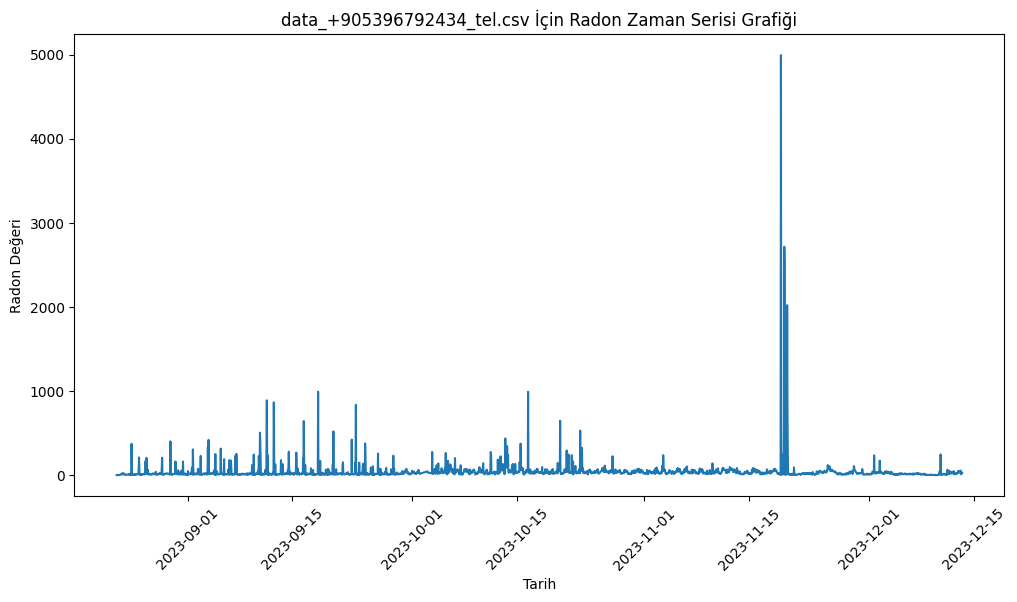

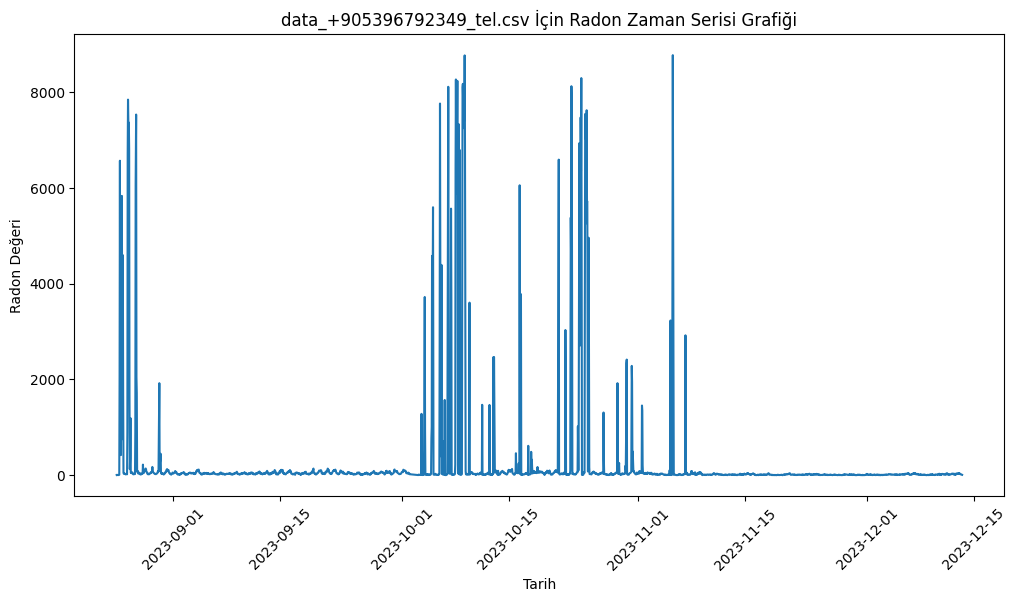

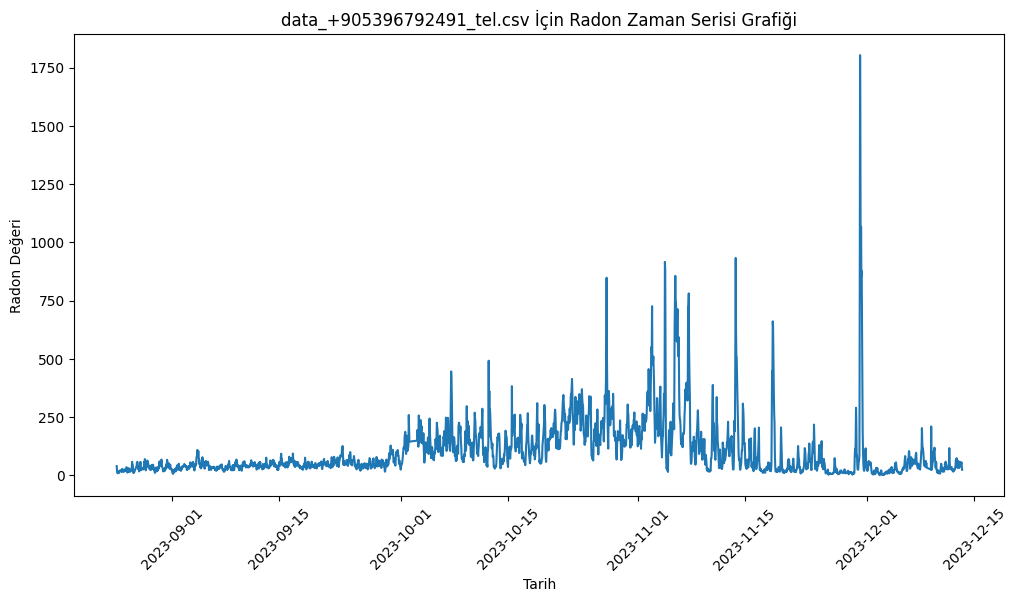

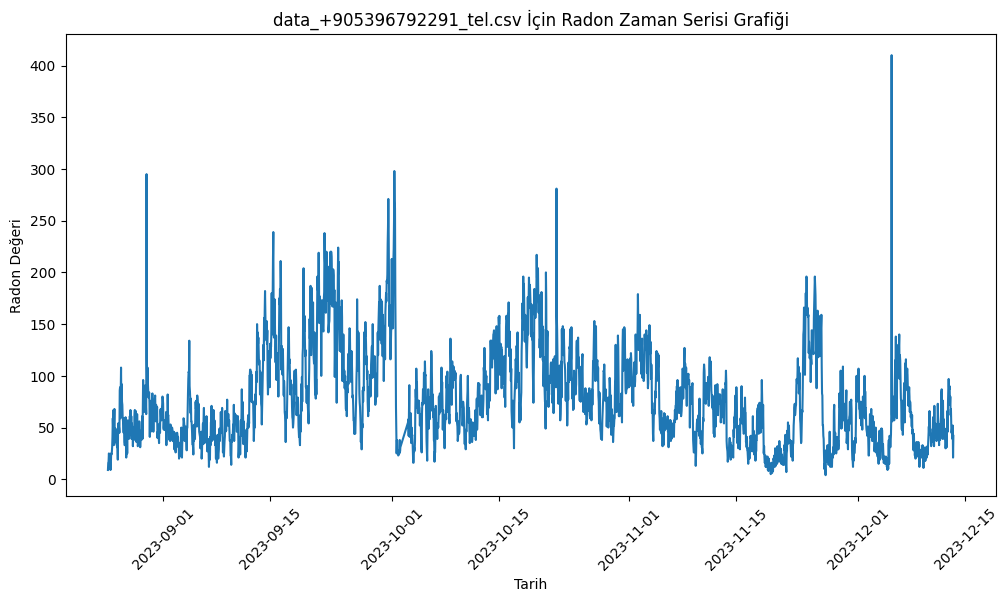

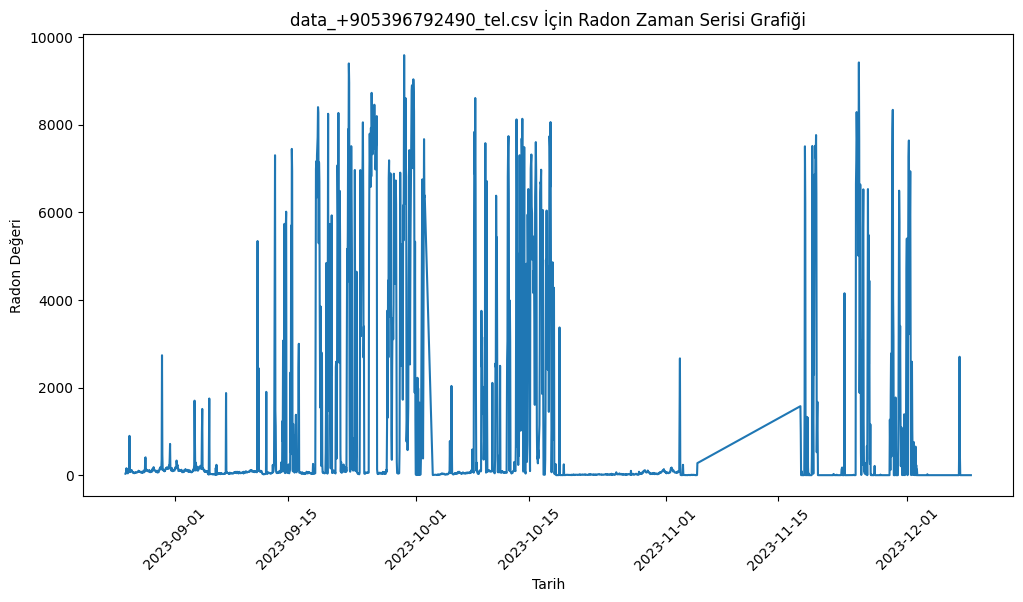

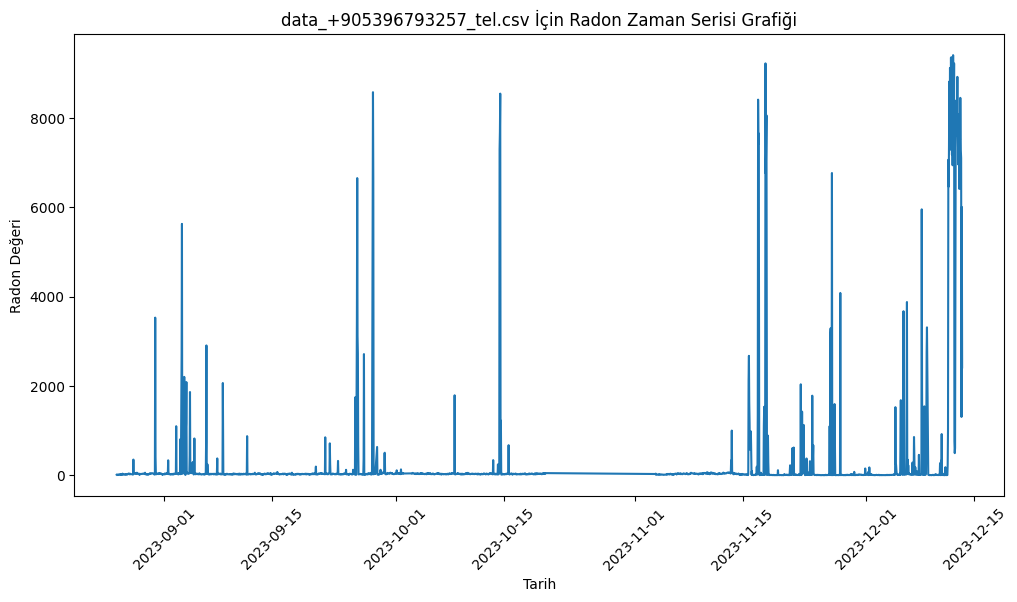

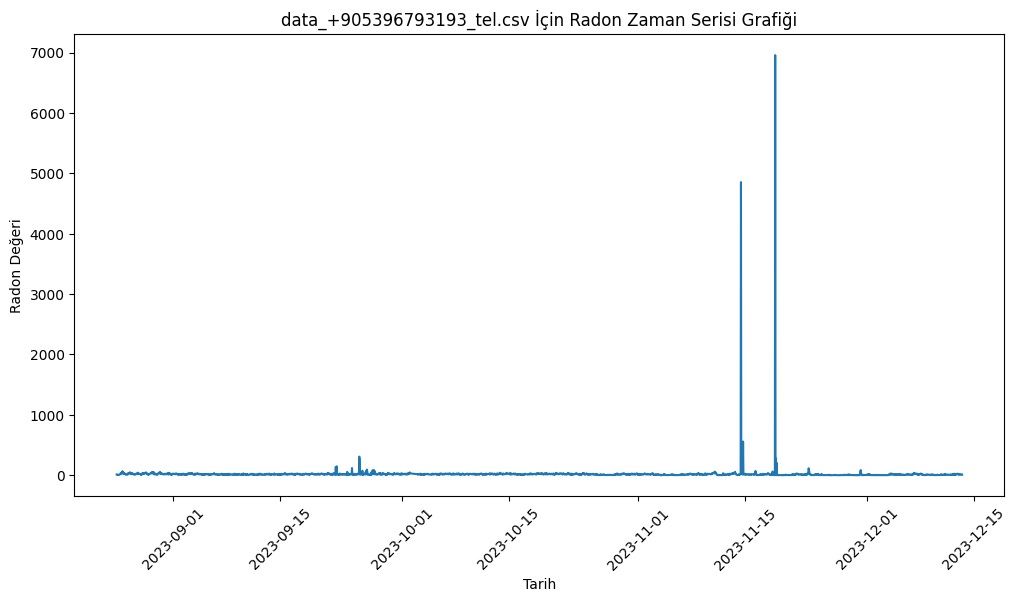

In [19]:
def plot_time_series(chosen_sheet):
    # Sayfayı oku
    file_path = os.path.join(csv_folder_path, chosen_sheet)
    df = pd.read_csv(file_path)

    # Türkçe formatındaki sayıları uygun formata dönüştür
    numeric_columns = df.columns[1:]
    df[numeric_columns] = df[numeric_columns].replace({',': '.'}, regex=True).astype(float)

    # Kontrol et: 'tarih' sütunu var mı?
    if 'tarih' not in df.columns:
        print(f"{chosen_sheet} adlı sayfa için 'tarih' sütunu bulunamadı.")
    else:
        # Tarih sütununu datetime formatına çevir
        df['tarih'] = pd.to_datetime(df['tarih'], format='%d.%m.%y-%H:%M:%S')

        # Seçilen sütunları belirle
        time_series_columns = ['tarih', 'radon_real']

        # Veriyi seçilen sütunlara göre filtrele
        time_series_data = df[time_series_columns]

        # Tarih sütununu indeks olarak ayarla
        time_series_data.set_index('tarih', inplace=True)

        # Zaman serisi grafiğini çiz
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=time_series_data, x=time_series_data.index, y='radon_real')
        plt.title(f"{chosen_sheet} İçin Radon Zaman Serisi Grafiği")
        plt.xlabel('Tarih')
        plt.ylabel('Radon Değeri')
        plt.xticks(rotation=45)
        plt.show()

# Chosen sheets list
chosen_sheets = [
    "data_+905396792434_tel.csv",
    "data_+905396792349_tel.csv",
    "data_+905396792491_tel.csv",
    "data_+905396792291_tel.csv",
    "data_+905396792490_tel.csv",
    #"data_+905396793251_tel.csv",
    "data_+905396793257_tel.csv",
    "data_+905396793193_tel.csv"
]

# Plot time series for each chosen sheet
for sheet in chosen_sheets:
    plot_time_series(sheet)


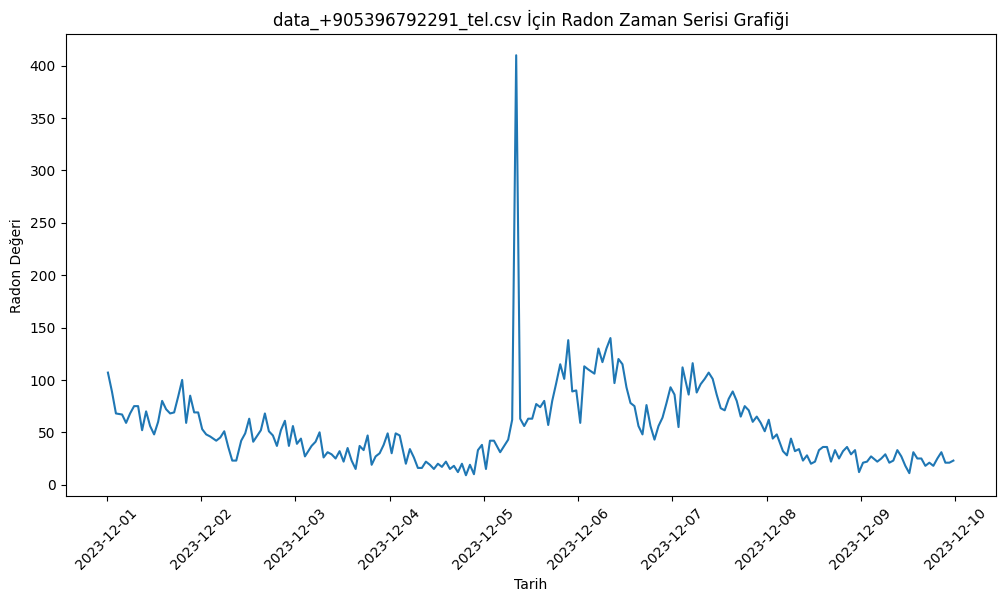

In [30]:
def plot_and_save_time_series(chosen_sheet, output_folder, start_date, end_date):
    # Sayfayı oku
    file_path = os.path.join(csv_folder_path, chosen_sheet)
    df = pd.read_csv(file_path)

    # Türkçe formatındaki sayıları uygun formata dönüştür
    numeric_columns = df.columns[1:]
    df[numeric_columns] = df[numeric_columns].replace({',': '.'}, regex=True).astype(float)

    # Kontrol et: 'tarih' sütunu var mı?
    if 'tarih' not in df.columns:
        print(f"{chosen_sheet} adlı sayfa için 'tarih' sütunu bulunamadı.")
    else:
        # Tarih sütununu datetime formatına çevir
        df['tarih'] = pd.to_datetime(df['tarih'], format='%d.%m.%y-%H:%M:%S')

        # Filter data within the specified date range
        df = df[(df['tarih'] >= start_date) & (df['tarih'] <= end_date)]

        # Seçilen sütunları belirle
        time_series_columns = ['tarih', 'radon_real']

        # Veriyi seçilen sütunlara göre filtrele
        time_series_data = df[time_series_columns]

        # Tarih sütununu indeks olarak ayarla
        time_series_data.set_index('tarih', inplace=True)

        # Zaman serisi grafiğini çiz
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=time_series_data, x=time_series_data.index, y='radon_real')
        plt.title(f"{chosen_sheet} İçin Radon Zaman Serisi Grafiği")
        plt.xlabel('Tarih')
        plt.ylabel('Radon Değeri')
        plt.xticks(rotation=45)
        plt.show()

        # Save the plot as a PNG file
        output_file_path = os.path.join(output_folder, f"{chosen_sheet}_time_series_plot.png")
        plt.savefig(output_file_path)
        plt.close()  # Close the plot to release resources

# Chosen sheet
chosen_sheet = "data_+905396792291_tel.csv"

# Output folder for saving PNG files
output_folder = '/content/drive/My Drive/bitirme/radon_analysis_final'

# Date filter for data (10.12.2023 in this example)
start_date = pd.to_datetime("2023-12-1")
end_date = pd.to_datetime("2023-12-10")

# Plot and save time series for the chosen sheet within the specified date range
plot_and_save_time_series(chosen_sheet_d1, output_folder, start_date, end_date)




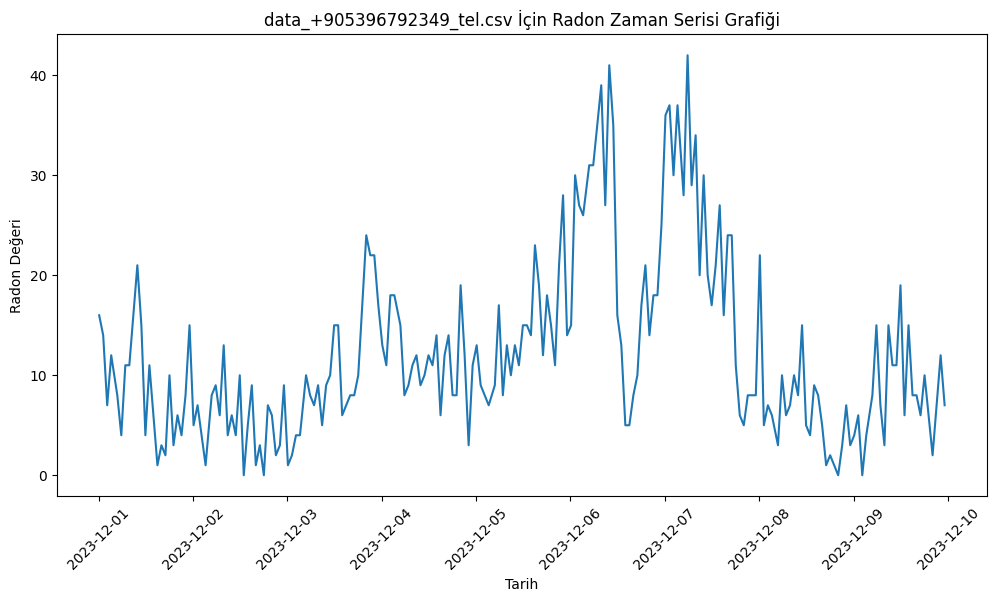

In [31]:
plot_and_save_time_series(chosen_sheet_d2, output_folder, start_date, end_date)

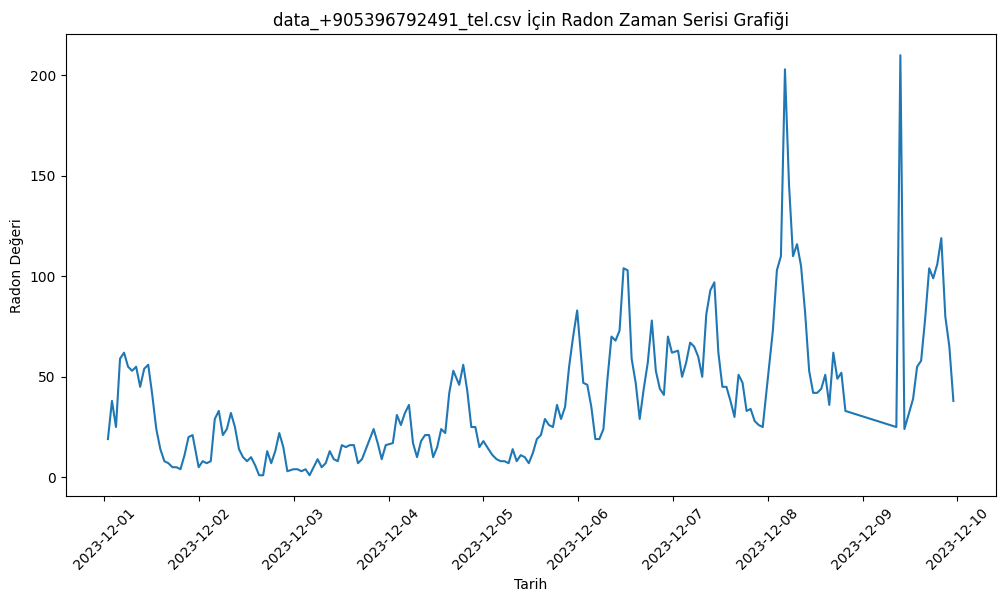

In [32]:
plot_and_save_time_series(chosen_sheet_d3, output_folder, start_date, end_date)

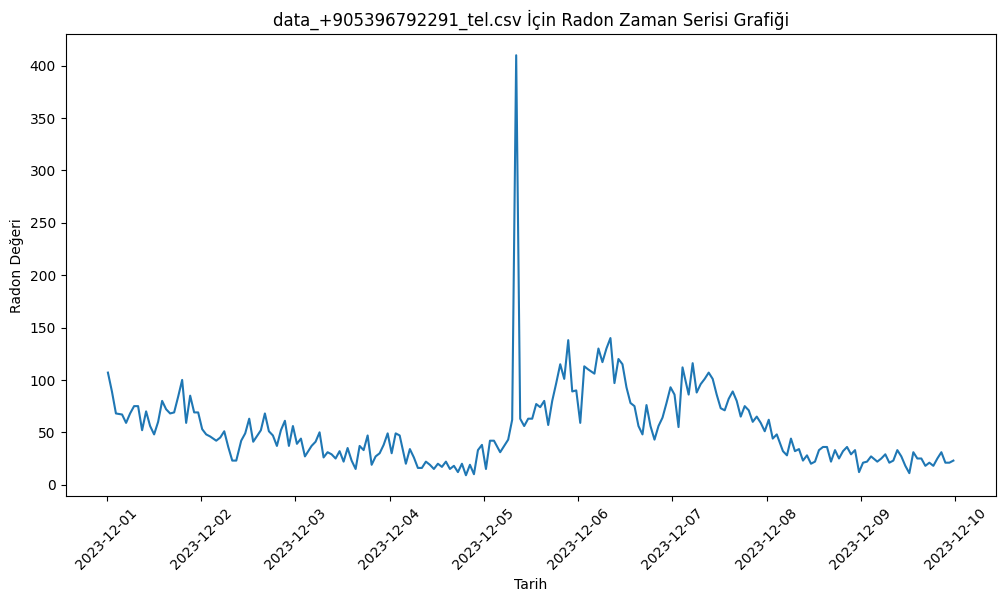

In [33]:
plot_and_save_time_series(chosen_sheet_d4, output_folder, start_date, end_date)

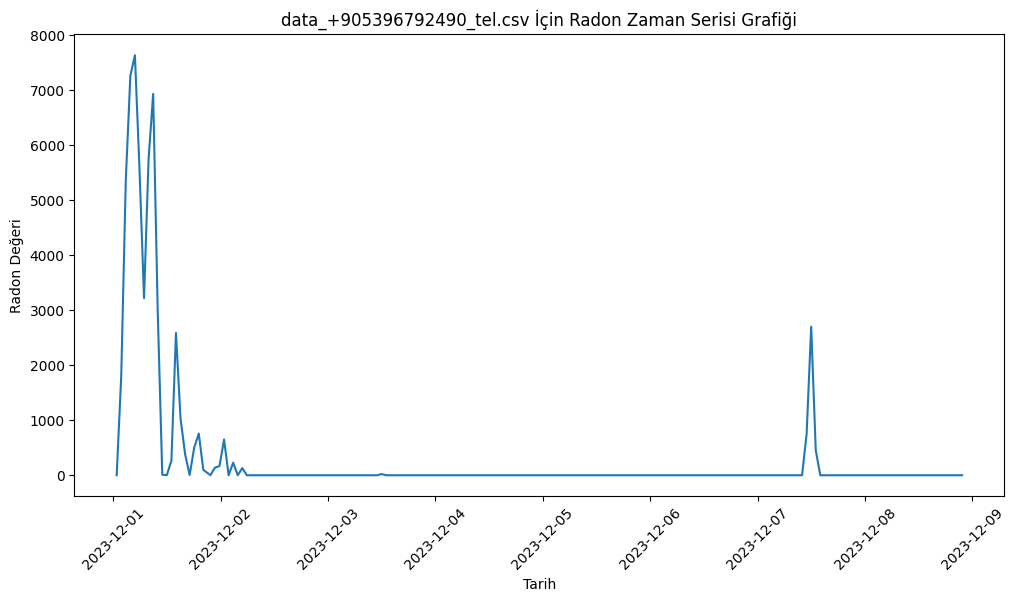

In [34]:
plot_and_save_time_series(chosen_sheet_d5, output_folder, start_date, end_date)

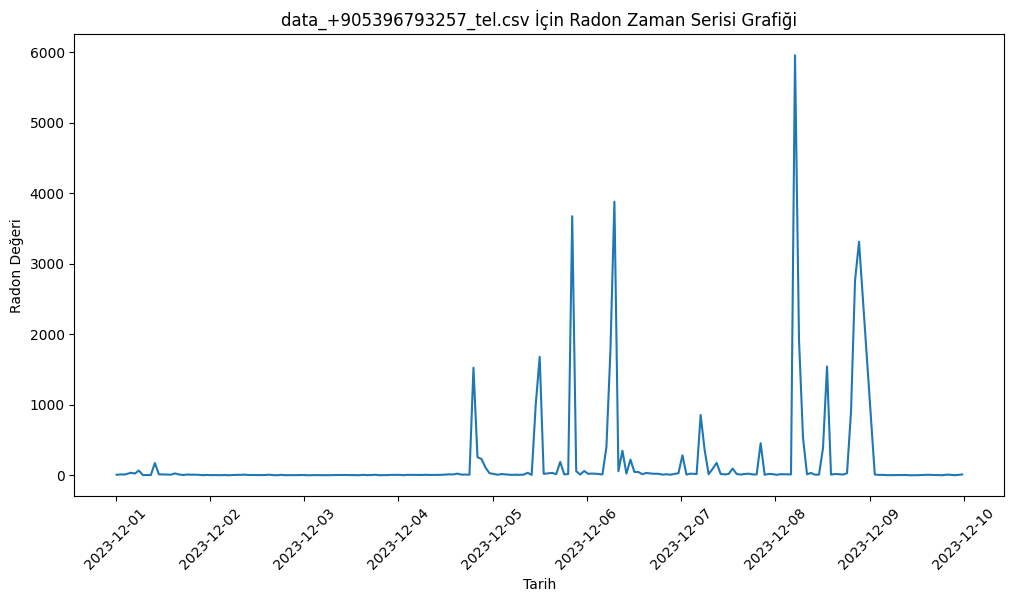

In [36]:
plot_and_save_time_series(chosen_sheet_d7, output_folder, start_date, end_date)

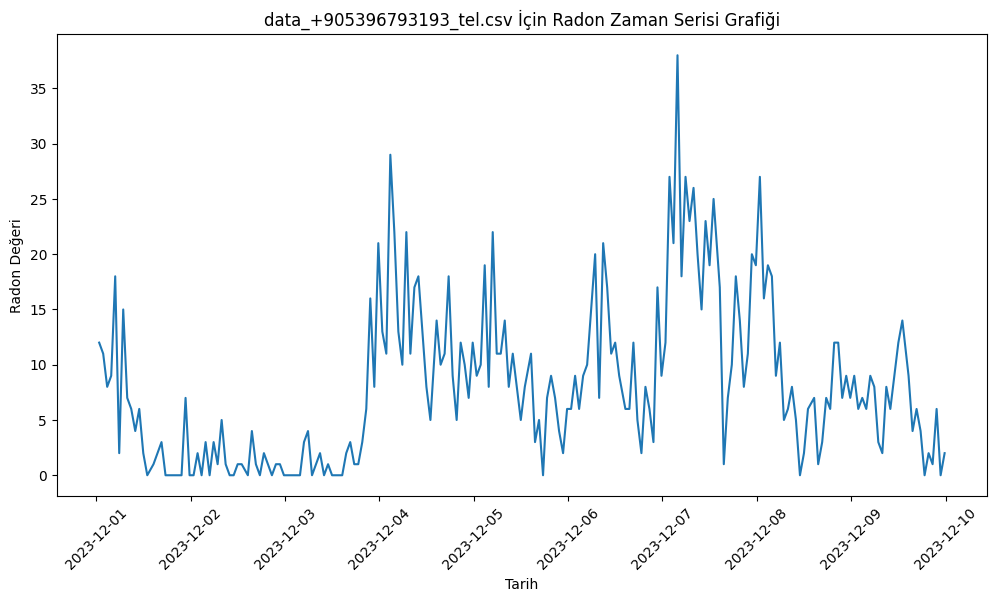

In [37]:
plot_and_save_time_series(chosen_sheet_d8, output_folder, start_date, end_date)